In [ ]:
 Scatter Plot

Objectives

Create and analyze scatter plots to examine relationships between variables.

Use scatter plots to identify trends and patterns in the dataset.

Focus on visualizations centered on scatter plots for better data-driven insights.

Setup: Working with the Database

In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

In [6]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

In [ ]:
ask 1: Exploring Relationships with Scatter Plots
1. Scatter Plot for Age vs. Job Satisfaction
Visualize the relationship between respondents' age (Age) and job satisfaction (JobSatPoints_6). Use this plot to identify any patterns or trends.

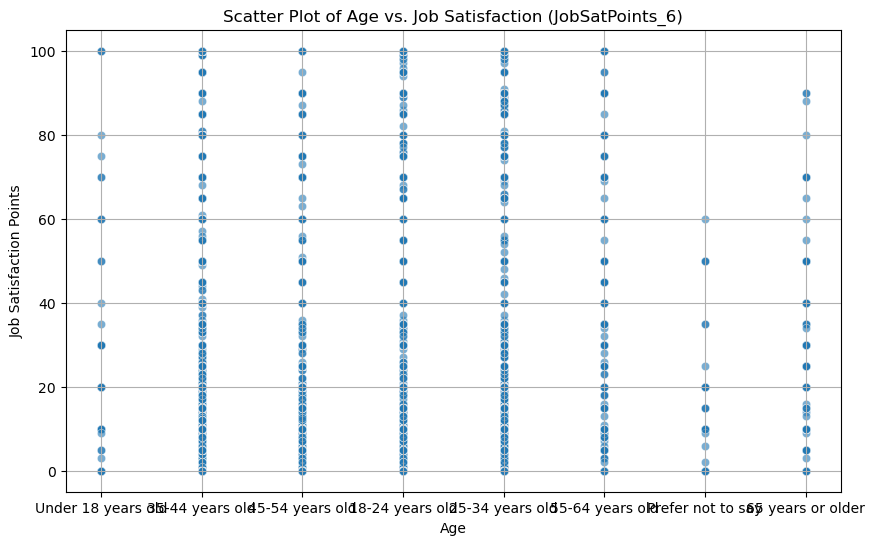

In [7]:

import seaborn as sns

# Scatter plot for Age vs. JobSatPoints_6
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='JobSatPoints_6', alpha=0.6)

plt.title('Scatter Plot of Age vs. Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Points')
plt.grid(True)
plt.show()


In [ ]:
2. Scatter Plot for Compensation vs. Job Satisfaction
Explore the relationship between yearly compensation (ConvertedCompYearly) and job satisfaction (JobSatPoints_6) using a scatter plot.

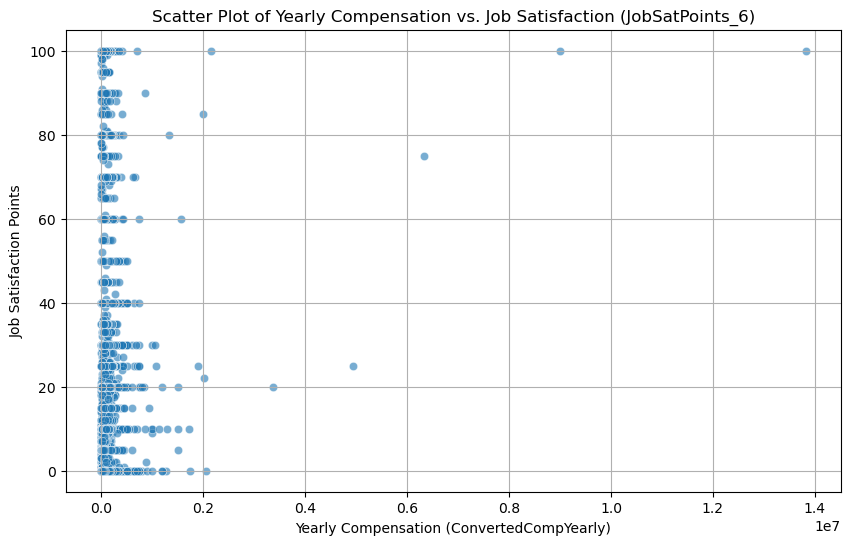

In [8]:

# Scatter plot for Compensation vs. Job Satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ConvertedCompYearly', y='JobSatPoints_6', alpha=0.6)

plt.title('Scatter Plot of Yearly Compensation vs. Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction Points')
plt.grid(True)
plt.show()


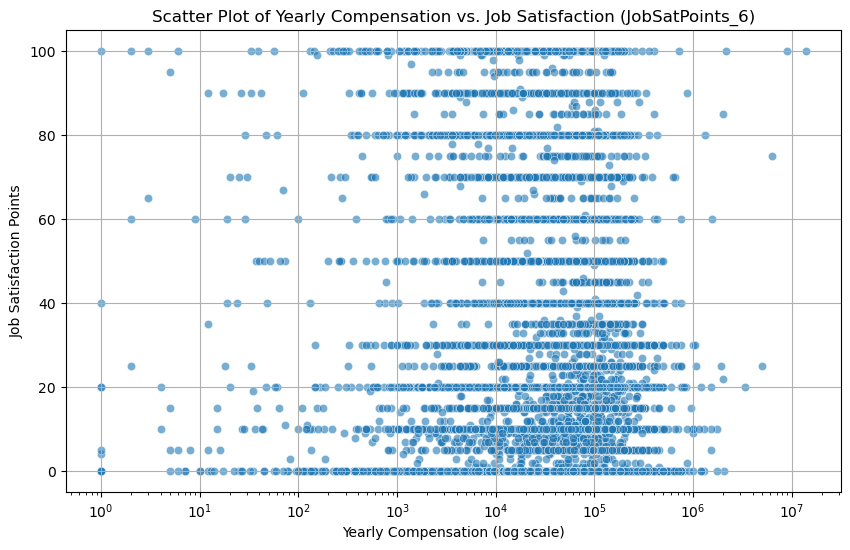

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ConvertedCompYearly', y='JobSatPoints_6', alpha=0.6)
plt.xscale('log')  # Log scale for better spread of compensation data

plt.title('Scatter Plot of Yearly Compensation vs. Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Yearly Compensation (log scale)')
plt.ylabel('Job Satisfaction Points')
plt.grid(True)
plt.show()


In [ ]:
Task 2: Enhancing Scatter Plots
1. Scatter Plot with Trend Line for Age vs. Job Satisfaction
Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.

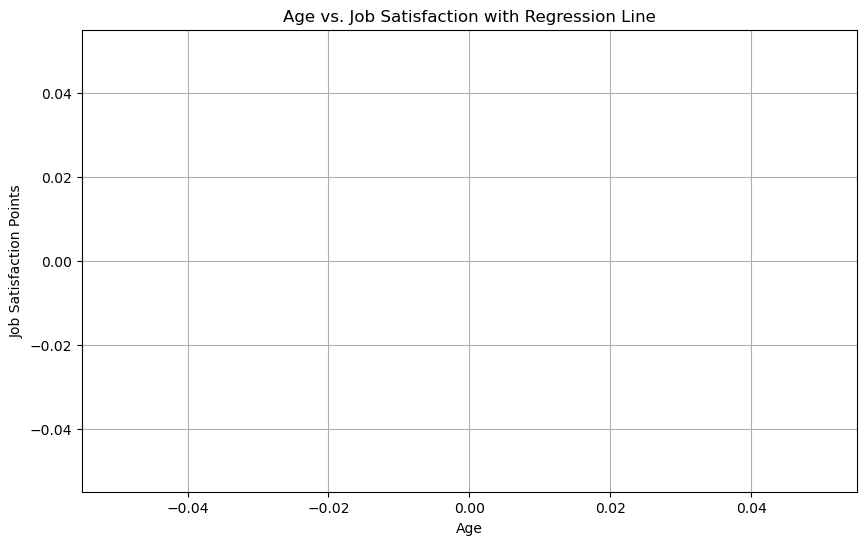

In [13]:
# Scatter plot with regression line for Age vs Job Satisfaction
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='JobSatPoints_6', data=df, scatter_kws={'alpha':0.5})

plt.title('Age vs. Job Satisfaction with Regression Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Points')
plt.grid(True)
plt.show()

In [ ]:
2. Scatter Plot for Age vs. Work Experience
Visualize the relationship between Age (Age) and Work Experience (YearsCodePro) using a scatter plot.

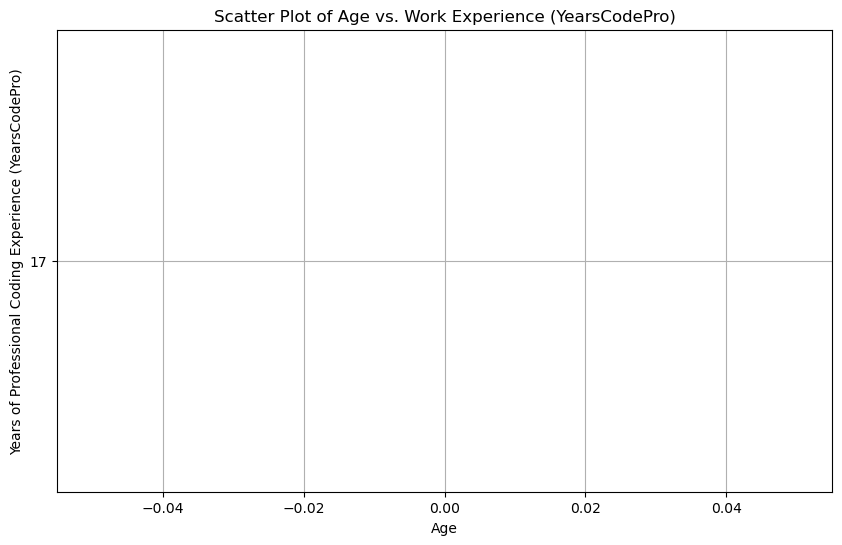

In [14]:
# Scatter plot for Age vs. Work Experience (YearsCodePro)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='YearsCodePro', alpha=0.6)

plt.title('Scatter Plot of Age vs. Work Experience (YearsCodePro)')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding Experience (YearsCodePro)')
plt.grid(True)
plt.show()

In [ ]:
Task 3: Combining Scatter Plots with Additional Features
1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size
Create a bubble plot to explore the relationship between yearly compensation (ConvertedCompYearly) and job satisfaction (JobSatPoints_6), with bubble size representing age.

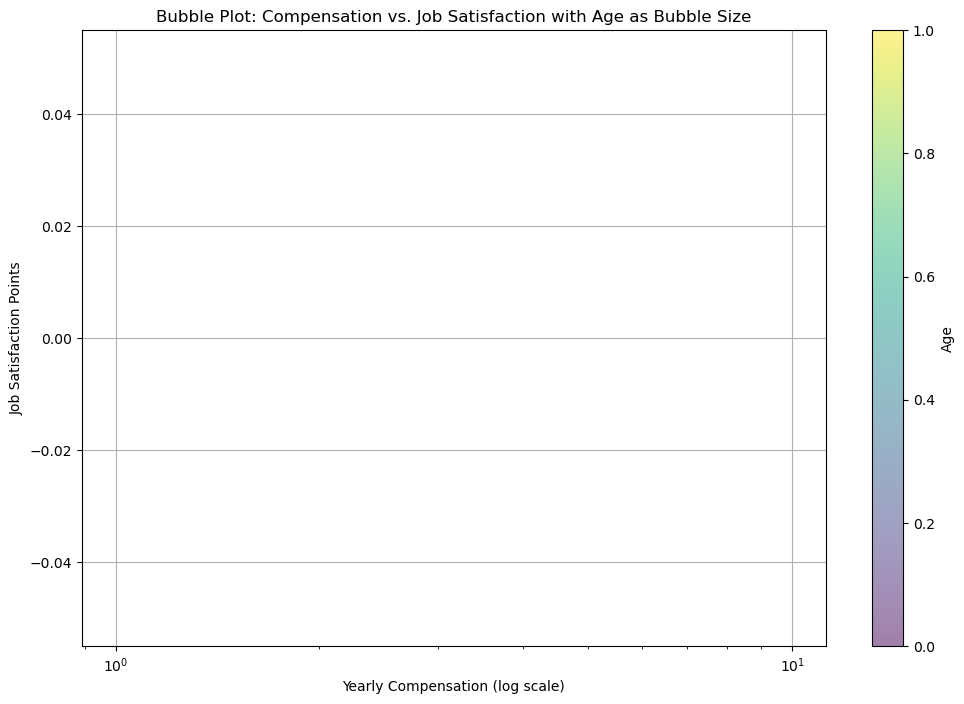

In [61]:
# Convert 'Age' to numeric, coerce errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


# Now plot
plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    x=df_clean['ConvertedCompYearly'], 
    y=df_clean['JobSatPoints_6'], 
    s=df_clean['Age']*5,  # Bubble size scaled by Age
    alpha=0.5,
    c=df_clean['Age'],    # Color by Age
    cmap='viridis',
    edgecolor='w',
    linewidth=0.5
)

plt.xscale('log')  # Log scale for compensation
plt.xlabel('Yearly Compensation (log scale)')
plt.ylabel('Job Satisfaction Points')
plt.title('Bubble Plot: Compensation vs. Job Satisfaction with Age as Bubble Size')

cbar = plt.colorbar(scatter)
cbar.set_label('Age')

plt.grid(True)
plt.show()

In [ ]:
2. Scatter Plot for Popular Programming Languages by Job Satisfaction
Visualize the popularity of programming languages (LanguageHaveWorkedWith) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.

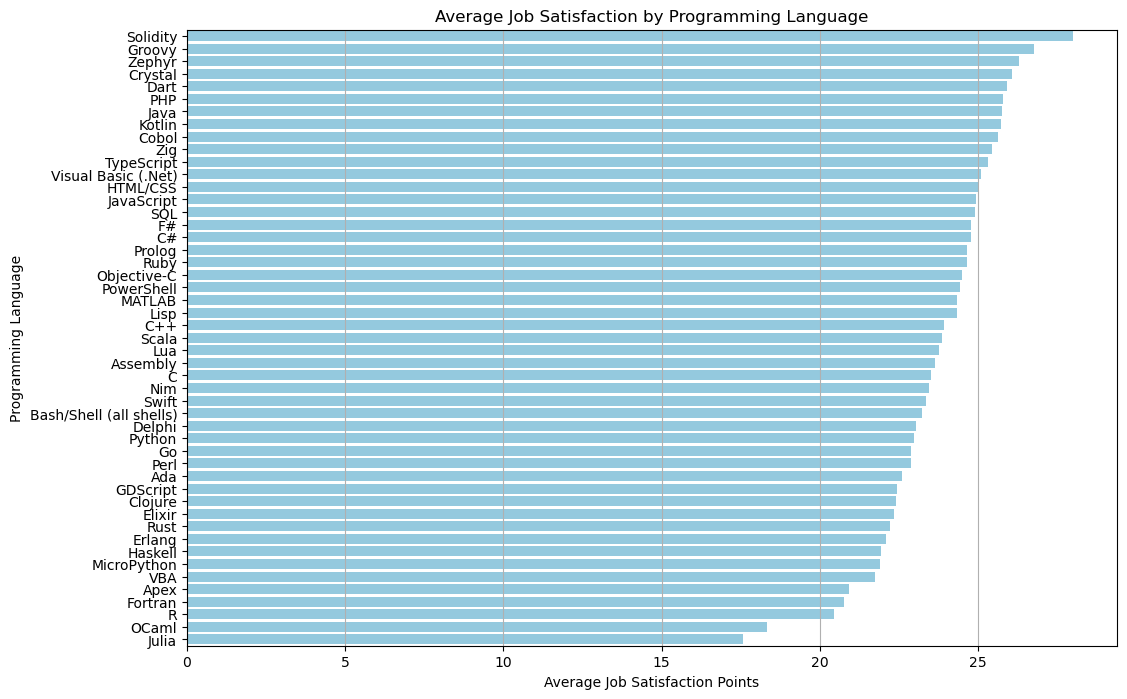

In [64]:

# Drop rows with missing relevant data
df_clean = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6']).copy()

# Split languages into lists
df_clean['Languages'] = df_clean['LanguageHaveWorkedWith'].str.split(';')

# Explode the list so each language has its own row
df_exploded = df_clean.explode('Languages')

# Strip whitespace from languages
df_exploded['Languages'] = df_exploded['Languages'].str.strip()

# Calculate average job satisfaction per language
avg_satisfaction = df_exploded.groupby('Languages')['JobSatPoints_6'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=avg_satisfaction.values, 
    y=avg_satisfaction.index, 
    color='skyblue'  # simple, clean color
)

plt.xlabel('Average Job Satisfaction Points')
plt.ylabel('Programming Language')
plt.title('Average Job Satisfaction by Programming Language')
plt.grid(axis='x')
plt.show()


In [ ]:
Task 4: Scatter Plot Comparisons Across Groups
1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type
Visualize the relationship between yearly compensation (ConvertedCompYearly) and job satisfaction (JobSatPoints_6), categorized by employment type (Employment). Use color coding or markers to differentiate between employment types.

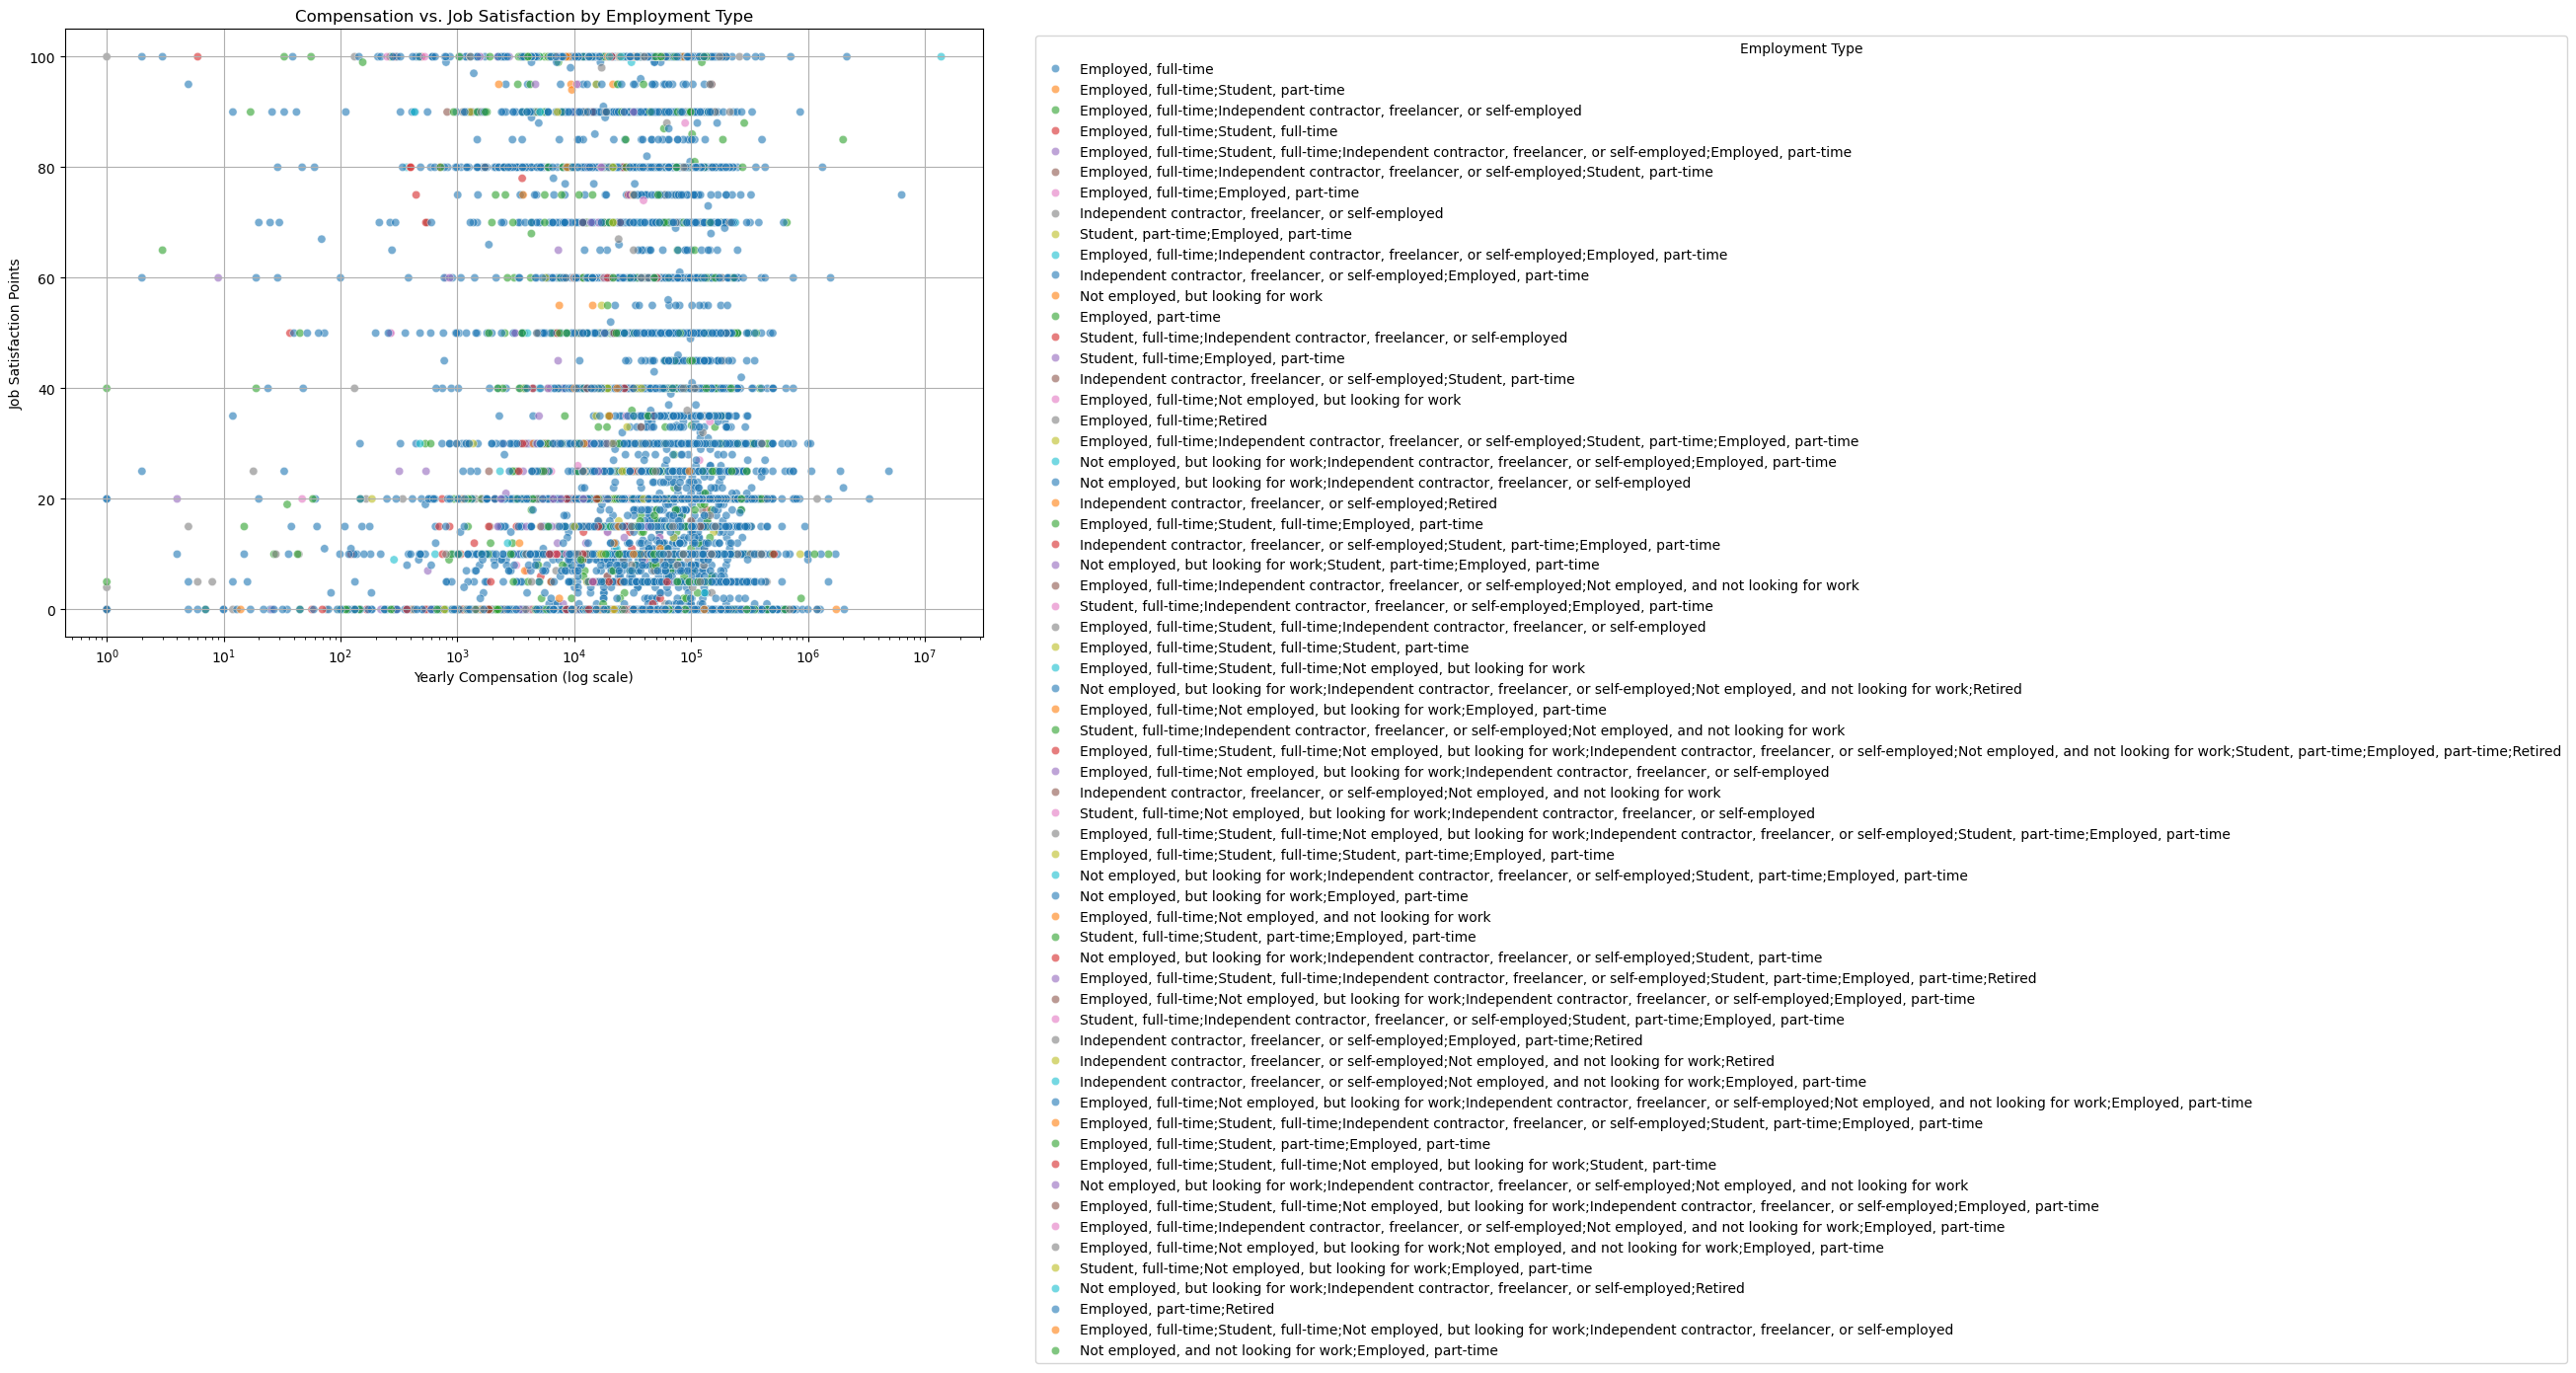

In [65]:

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_clean,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    alpha=0.6,
    palette='tab10'
)

plt.xscale('log')  # Use log scale for better visualization
plt.xlabel('Yearly Compensation (log scale)')
plt.ylabel('Job Satisfaction Points')
plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

In [ ]:
2. Scatter Plot for Work Experience vs. Age Group by Country
Compare work experience (YearsCodePro) across different age groups (Age) and countries (Country). Use colors to represent different countries and markers for age groups.

In [57]:
print("Columns in df_filtered:", df_filtered.columns)
print("Sample 'Country' values:\n", df_filtered['Country'].head())
print("Any null values in Country?:", df_filtered['Country'].isnull().any())
print("Is df_filtered empty?:", df_filtered.empty)


Columns in df_filtered: Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'AgeGroup'],
      dtype='object', length=115)
Sample 'Country' values:
 Series([], Name: Country, dtype: object)
Any null values in Country?: False
Is df_filtered empty?: True


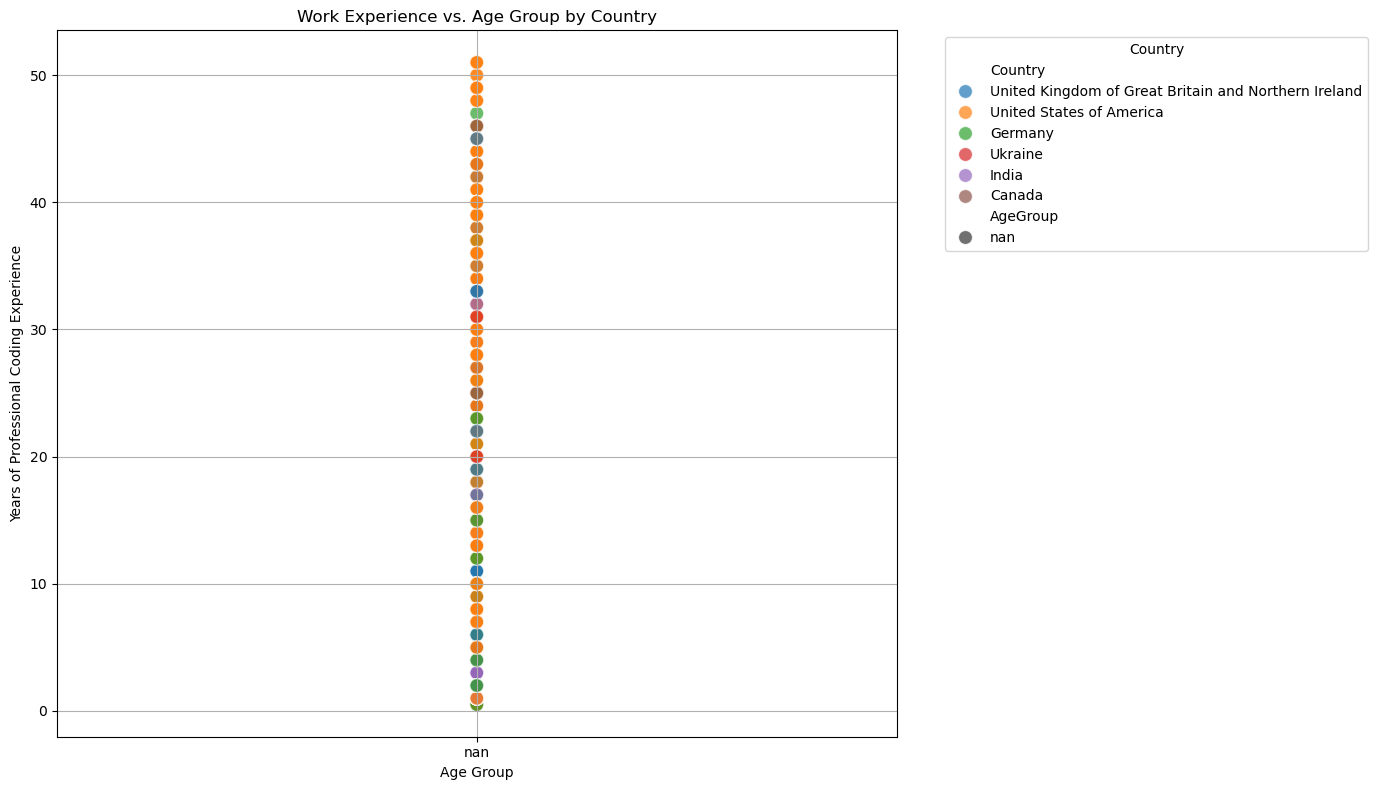

In [67]:



# Convert YearsCodePro to numeric
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Convert Age to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')



# Create Age Groups
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '65+']
df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=False)
df_clean['AgeGroup'] = df_clean['AgeGroup'].astype(str)

# Check top countries for filtering to keep plot clean
top_countries = df_clean['Country'].value_counts().nlargest(6).index.tolist()

# Filter data to top countries
df_filtered = df_clean[df_clean['Country'].isin(top_countries)]

# Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_filtered,
    x='AgeGroup',
    y='YearsCodePro',
    hue='Country',
    style='AgeGroup',
    palette='tab10',
    alpha=0.7,
    s=100
)

plt.title('Work Experience vs. Age Group by Country')
plt.xlabel('Age Group')
plt.ylabel('Years of Professional Coding Experience')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()
